# 7/9: EDA - cleaning, checking for and handling missing data

In [1]:
#import libraries
import io
import time
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Clean and load data

In [248]:
def get_data(filename_string):
    #print(type(filename_string), filename_string)
    
    #1. read in data
    data = pd.read_csv(filename_string)
    #print(data.shape)
    
    #2. drop null index col, null rows where date does not exist in month
    data.drop(['Unnamed: 0'], axis=1, inplace = True)
    data = data[data['state code'].isnull() == False]
    #print(data.shape)
    
    #3. convert data columns to desired type
    data['issue date'] = pd.to_datetime(data['issue date'])
    data['valid date'] = pd.to_datetime(data['valid date'])
    
    data['record sequence'] = data['record sequence'].astype('int64')
    data['action day']=[True if day == 'Yes' else False for day in data['action day']]    #no missing values
    
    data['urldate'] = pd.to_datetime(data['urldate'])
    #print(data.dtypes)
    
    #4. create calculated data column: feature
    data['categorical'] = [1 if (cat == 'Good' or cat == 'Moderate') else 0 for cat in data['AQI category']]
    #print(data.shape)
    
    return(data)

In [249]:
data = get_data('data.csv')

In [251]:
data.shape

(1897901, 19)

In [118]:
#check which columns have missing values
for col in data.columns:
    print(col, ':', data[col].isnull().value_counts()[0])
    #print('\n')
    
#Valid time: 1491289 nulls, 406612 text values
#AQI value: 1417393 nulls, 480508 float values
#discussion: 1544333 nulls, 353568 text values
#AQI category: no nulls --> beware: is there a catch-all category for null AQI value rows?
    #no, AQI category has no null b/c the category is pulled from data type 'O' if unavailable for 'F'
#---------------------------------------------------------------------------------------------
#Issue date: no nulls
#Valid date: no nulls
#Time zone: no nulls
#Record sequence: no nulls
#data type: no nulls
#primary: no nulls
#reporting area: no nulls
#state code: no nulls
#latitude: no nulls
#longitdue: no nulls
#pollutant: no nulls
#action day: no nulls
#forecast source: no nulls
#urldate: no nulls
#categorical: no nulls

issue date : 1897901
valid date : 1897901
valid time : 406612
time zone : 1897901
record sequence : 1897901
data type : 1897901
primary : 1897901
reporting area : 1897901
state code : 1897901
latitude : 1897901
longitude : 1897901
pollutant : 1897901
AQI value : 1417393
AQI category : 1897901
action day : 1897901
discussion : 353568
forecast source : 1897901
urldate : 1897901
categorical : 1897901


In [172]:
test = data[data['data type'] == 'F']
test[test['AQI value'].isna()]

,issue date,valid date,valid time,time zone,record sequence,data type,primary,reporting area,state code,latitude,longitude,pollutant,AQI value,AQI category,action day,discussion,forecast source,urldate,categorical
22,2017-05-31,2017-06-01,NaN,MDT,1,F,Y,Albuquerque,NM,35.0833,-106.6511,PM2.5,NaN,Good,False,NaN,Albuquerque Environmental Health Department,1970-01-01 00:00:00.020170601,1
23,2017-05-31,2017-06-01,NaN,MDT,1,F,N,Albuquerque,NM,35.0833,-106.6511,OZONE,NaN,Good,False,NaN,Albuquerque Environmental Health Department,1970-01-01 00:00:00.020170601,1
27,2017-05-31,2017-06-02,NaN,MDT,2,F,Y,Albuquerque,NM,35.0833,-106.6511,PM2.5,NaN,Good,False,NaN,Albuquerque Environmental Health Department,1970-01-01 00:00:00.020170601,1
28,2017-05-31,2017-06-02,NaN,MDT,2,F,N,Albuquerque,NM,35.0833,-106.6511,OZONE,NaN,Good,False,NaN,Albuquerque Environmental Health Department,1970-01-01 00:00:00.020170601,1
29,2017-05-31,2017-06-03,NaN,MDT,3,F,Y,Albuquerque,NM,35.0833,-106.6511,PM2.5,NaN,Good,False,NaN,Albuquerque Environmental Health Department,1970-01-01 00:00:00.020170601,1
30,2017-05-31,2017-06-03,NaN,MDT,3,F,N,Albuquerque,NM,35.0833,-106.6511,OZONE,NaN,Good,False,NaN,Albuquerque Environmental Health Department,1970-01-01 00:00:00.020170601,1
31,2017-05-31,2017-06-04,NaN,MDT,4,F,Y,Albuquerque,NM,35.0833,-106.6511,PM2.5,NaN,Good,False,NaN,Albuquerque Environmental Health Department,1970-01-01 00:00:00.020170601,1
32,2017-05-31,2017-06-04,NaN,MDT,4,F,N,Albuquerque,NM,35.0833,-106.6511,OZONE,NaN,Good,False,NaN,Albuquerque Environmental Health Department,1970-01-01 00:00:00.020170601,1
33,2017-05-31,2017-06-05,NaN,MDT,5,F,Y,Albuquerque,NM,35.0833,-106.6511,PM2.5,NaN,Good,False,NaN,Albuquerque Environmental Health Department,1970-01-01 00:00:00.020170601,1
34,2017-05-31,2017-06-05,NaN,MDT,5,F,N,Albuquerque,NM,35.0833,-106.6511,OZONE,NaN,Good,False,NaN,Albuquerque Environmental Health Department,1970-01-01 00:00:00.020170601,1


In [177]:
test2 = data[data['valid date'] == '2017-05-31']
test2[test2['reporting area'] == 'Albuquerque']

,issue date,valid date,valid time,time zone,record sequence,data type,primary,reporting area,state code,latitude,longitude,pollutant,AQI value,AQI category,action day,discussion,forecast source,urldate,categorical
19,2017-06-01,2017-05-31,NaN,MDT,-1,Y,Y,Albuquerque,NM,35.0833,-106.6511,OZONE,61.0,Moderate,False,NaN,Albuquerque Environmental Health Department,1970-01-01 00:00:00.020170601,1
20,2017-06-01,2017-05-31,NaN,MDT,-1,Y,N,Albuquerque,NM,35.0833,-106.6511,PM2.5,48.0,Good,False,NaN,Albuquerque Environmental Health Department,1970-01-01 00:00:00.020170601,1
21,2017-06-01,2017-05-31,NaN,MDT,-1,Y,N,Albuquerque,NM,35.0833,-106.6511,PM10,28.0,Good,False,NaN,Albuquerque Environmental Health Department,1970-01-01 00:00:00.020170601,1


# Pinpointing null AQI values

In [152]:
#Q: Where are null AQI values coming from?
data['AQI value'].isna().value_counts()

False    1417393
True      480508
Name: AQI value, dtype: int64

In [150]:
#Accounted for by data type = Forecast column, where the AQI value is forecasted for the next day
data[data['data type'] == 'F']['AQI value'].isna().value_counts()

False    606976
True     480508
Name: AQI value, dtype: int64

In [151]:
data[data['data type'] == 'Y']['AQI value'].isna().value_counts()

False    403805
Name: AQI value, dtype: int64

In [147]:
#For our purpose of using the current observation to predict the next day's AQI value: there is no missing data
data[data['data type'] == 'O']['AQI value'].isna().value_counts()

False    406612
Name: AQI value, dtype: int64

# Missing value distribution by relevant timeframe, state and reporting area

In [565]:
def missingvals(data, month, year, daystovalid, state = 'CA', reparea = 'San Francisco'):
    #filter df to relevant month, year and forecast observation by date of observation
    data = data[data['valid date'].dt.month == month]
    data = data[data['valid date'].dt.year == year]
    data = data[data['data type'] == 'F']
    
    #filter df to relevant state, reporting area
    data = data[data['state code'] == state]
    data = data[data['reporting area'] == reparea]
    
    #filter for daystovalid: prediction time to realization
    data = data[data['record sequence'] == daystovalid]
    data = data.drop_duplicates(['valid date'])
    
    #filter for rows of missing AQI values
    data = data[data['AQI value'].isna() == True]
    
    return(data)


In [566]:
sf_2018 = missingvals(data, 6, 2018, 2)
sf_2018.head(5)

,issue date,valid date,valid time,time zone,record sequence,data type,primary,reporting area,state code,latitude,longitude,pollutant,AQI value,AQI category,action day,discussion,forecast source,urldate,categorical
1777486,2018-05-30,2018-06-01,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,NaN,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180530,1
1782909,2018-05-31,2018-06-02,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,NaN,Moderate,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180531,1
1788749,2018-06-01,2018-06-03,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,NaN,Moderate,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180601,1
1804751,2018-06-04,2018-06-06,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,NaN,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180604,1
1810157,2018-06-05,2018-06-07,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,NaN,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180605,1


In [521]:
#for a specific date, for a specific state, for a specific reporting area, by valid date
def fillervals(data, month, year, state = 'CA', reparea = 'San Francisco'):
    #filter df to relevant month, year and current observation by date of observation
    data = data[data['valid date'].dt.month == month]
    data = data[data['valid date'].dt.year == year]
    data = data[data['data type'] == 'O']
    
    #filter df to relevant state, reporting area
    data = data[data['state code'] == state]
    data = data[data['reporting area'] == reparea]
    
    return(data)

In [522]:
sf_2017 = fillervals(data, 6, 2017)
print(sf_2017.shape)    #51 relevant observations
display(sf_2017)

(51, 19)


,issue date,valid date,valid time,time zone,record sequence,data type,primary,reporting area,state code,latitude,longitude,pollutant,AQI value,AQI category,action day,discussion,forecast source,urldate,categorical
23961,2017-06-05,2017-06-05,21:00,PDT,0,O,Y,San Francisco,CA,37.75,-122.43,PM2.5,69.0,Moderate,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020170605,1
23962,2017-06-05,2017-06-05,21:00,PDT,0,O,N,San Francisco,CA,37.75,-122.43,OZONE,26.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020170605,1
28859,2017-06-06,2017-06-06,21:00,PDT,0,O,Y,San Francisco,CA,37.75,-122.43,PM2.5,47.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020170606,1
28860,2017-06-06,2017-06-06,21:00,PDT,0,O,N,San Francisco,CA,37.75,-122.43,OZONE,26.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020170606,1
33800,2017-06-07,2017-06-07,21:00,PDT,0,O,Y,San Francisco,CA,37.75,-122.43,PM2.5,30.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020170607,1
33801,2017-06-07,2017-06-07,21:00,PDT,0,O,N,San Francisco,CA,37.75,-122.43,OZONE,21.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020170607,1
38751,2017-06-08,2017-06-08,21:00,PDT,0,O,Y,San Francisco,CA,37.75,-122.43,PM2.5,20.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020170608,1
38752,2017-06-08,2017-06-08,21:00,PDT,0,O,N,San Francisco,CA,37.75,-122.43,OZONE,16.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020170608,1
44184,2017-06-09,2017-06-09,21:00,PDT,0,O,Y,San Francisco,CA,37.75,-122.43,PM2.5,32.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020170609,1
44185,2017-06-09,2017-06-09,21:00,PDT,0,O,N,San Francisco,CA,37.75,-122.43,OZONE,26.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020170609,1


In [523]:
#check for null AQI values
sf_2017['AQI value'].isna().value_counts()    #none

False    51
Name: AQI value, dtype: int64

# Test case of data imputation: San Francisco

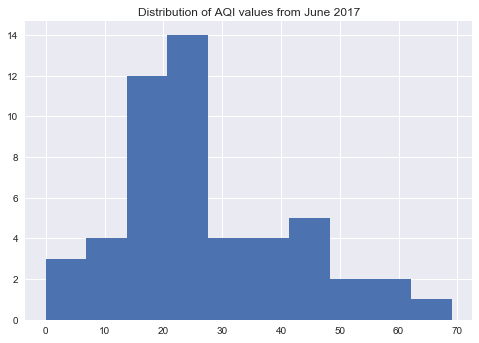

In [524]:
#look at distribution of  2017 observed AQI values over given timeframe
plt.hist(sf_2017['AQI value']);
plt.title('Distribution of AQI values from June 2017');

In [530]:
#Option 1: sample from distribution of June 2017 observed AQI values and impute for missing values
sf_sample = sf_2017['AQI value'].sample(n=14, replace = True)
print(len(sf_sample))
print('\n')
print(sf_sample)    #values drawn to be incorporated

14


38751     20.0
69118     42.0
54132     39.0
88718     22.0
33801     21.0
114421     0.0
54133     25.0
79050     19.0
79049     21.0
114421     0.0
124344     9.0
79050     19.0
38752     16.0
69119     26.0
Name: AQI value, dtype: float64


In [531]:
sf_sample.values

array([20., 42., 39., 22., 21.,  0., 25., 19., 21.,  0.,  9., 19., 16.,
       26.])

In [532]:
sf_2018_missing['AQI value'] = sf_sample.values

/Users/chelen/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [536]:
sf_2018_missing.head(2)

,issue date,valid date,valid time,time zone,record sequence,data type,primary,reporting area,state code,latitude,longitude,pollutant,AQI value,AQI category,action day,discussion,forecast source,urldate,categorical
1777486,2018-05-30,2018-06-01,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,20.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180530,1
1782909,2018-05-31,2018-06-02,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,42.0,Moderate,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180531,1


In [535]:
sf_2018_imputed = pd.concat([sf_2018_missing, sf_2018_observed], axis = 0, ignore_index = False)
sf_2018_imputed.sort_values(['valid date']).head(2)

,issue date,valid date,valid time,time zone,record sequence,data type,primary,reporting area,state code,latitude,longitude,pollutant,AQI value,AQI category,action day,discussion,forecast source,urldate,categorical
1777486,2018-05-30,2018-06-01,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,20.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180530,1
1782909,2018-05-31,2018-06-02,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,42.0,Moderate,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180531,1


In [537]:
#Option 2: since this is weather data, can impute the AQI value from the previous year date rather than sampling
    #look for matching valid date from previous year and current year

print(sf_2018['valid date'].head(2))
print('\n')
print(sf_2017['valid date'].head(2))

1777486   2018-06-01
1782909   2018-06-02
Name: valid date, dtype: datetime64[ns]


23961   2017-06-05
23962   2017-06-05
Name: valid date, dtype: datetime64[ns]


In [538]:
#dropping duplicate valid dates from June 2017 sf observed data: keeping the first observation of each valid date
sf_2017.drop_duplicates(['valid date'], inplace = True)
sf_2017['valid date'].head(2)

23961   2017-06-05
28859   2017-06-06
Name: valid date, dtype: datetime64[ns]

In [539]:
#impute previous year AQI value where valid date from previous year and current year match in dfs
    #for missing AQI values this year that do not have a corresponding observation from previous year, impute from sf_sample
#can turn this into a function by passing in args for previous year df and current year df
    #subsequent to missing values function call

def impute_match(cur, prev):
    for date_t in cur['valid date'].unique():
        #2018
        #print (date_t)
        curmth = cur[cur['valid date'] == date_t]['valid date'].dt.month.values[0]
        curday = cur[cur['valid date'] == date_t]['valid date'].dt.day.values[0]
        curmthday = str(curmth) + '-' + str(curday)
        #print('curmthday:', curmthday)

        for date_t_1 in prev['valid date']:
            #2017
            #print (date_t_1)
            prevmth = prev[prev['valid date'] == date_t_1]['valid date'].dt.month.values[0]
            prevday = prev[prev['valid date'] == date_t_1]['valid date'].dt.day.values[0]
            prevmthday = str(prevmth) + '-' + str(prevday)
            #print('prevmthday:', prevmthday)

            #impute if dates match: take prev year AQI value and set it as current year AQI value on matching date
            if curmthday == prevmthday:
                #print('match:', curmthday, prevmthday)
                prevAQIval = prev[prev['valid date'] == date_t_1]['AQI value'].values[0]
                #print('prevAQIval:', prevAQIval)
                curAQIval = cur[cur['valid date'] == date_t]['AQI value'].values[0]
                #print('curAQIval:', curAQIval)
                index = cur[cur['valid date'] == date_t].index.values[0]
                cur.at[index, 'AQI value'] = prevAQIval
                #print('imputedAQIval:', cur[cur['valid date'] == date_t]['AQI value'].values[0])
    return(cur)


In [543]:
sf_2018_imputed = impute_match(cur = sf_2018, prev = sf_2017)

In [544]:
#can use previous sampling distribution method to handle those that do not have date matches

In [547]:
sf_2018_imputed

,issue date,valid date,valid time,time zone,record sequence,data type,primary,reporting area,state code,latitude,longitude,pollutant,AQI value,AQI category,action day,discussion,forecast source,urldate,categorical
1777486,2018-05-30,2018-06-01,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,NaN,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180530,1
1782909,2018-05-31,2018-06-02,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,NaN,Moderate,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180531,1
1788749,2018-06-01,2018-06-03,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,NaN,Moderate,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180601,1
1794301,2018-06-02,2018-06-04,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,42.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180602,1
1804751,2018-06-04,2018-06-06,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,47.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180604,1
1810157,2018-06-05,2018-06-07,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,30.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180605,1
1815435,2018-06-06,2018-06-08,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,20.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180606,1
1820786,2018-06-07,2018-06-09,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,32.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180607,1
1826652,2018-06-08,2018-06-10,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,29.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180608,1
1842605,2018-06-11,2018-06-13,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,50.0,Moderate,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180611,1


In [548]:
def impute_sample(cur, prev):
    curmiss = cur[cur['AQI value'].isna() == True]
    curobs = cur[cur['AQI value'].isna() == False]
    #print(curmiss.shape, curobs.shape)
    
    #print(curmiss.shape[0])
    sample = prev['AQI value'].sample(n=curmiss.shape[0], replace = True)
    #print(sample, sample.values)
    curmiss['AQI value'] = sample.values
    
    cur = pd.concat([curmiss, curobs], axis = 0, ignore_index = False)
    cur.sort_values(['valid date'], inplace = True)
    
    return(cur)
    

In [550]:
sf_2018_sampled = impute_sample(sf_2018_imputed, sf_2017)
sf_2018_sampled

/Users/chelen/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,issue date,valid date,valid time,time zone,record sequence,data type,primary,reporting area,state code,latitude,longitude,pollutant,AQI value,AQI category,action day,discussion,forecast source,urldate,categorical
1777486,2018-05-30,2018-06-01,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,47.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180530,1
1782909,2018-05-31,2018-06-02,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,39.0,Moderate,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180531,1
1788749,2018-06-01,2018-06-03,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,50.0,Moderate,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180601,1
1794301,2018-06-02,2018-06-04,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,42.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180602,1
1804751,2018-06-04,2018-06-06,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,47.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180604,1
1810157,2018-06-05,2018-06-07,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,30.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180605,1
1815435,2018-06-06,2018-06-08,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,20.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180606,1
1820786,2018-06-07,2018-06-09,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,32.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180607,1
1826652,2018-06-08,2018-06-10,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,29.0,Good,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180608,1
1842605,2018-06-11,2018-06-13,NaN,PDT,2,F,Y,San Francisco,CA,37.75,-122.43,PM2.5,50.0,Moderate,False,NaN,San Francisco Bay Area AQMD,1970-01-01 00:00:00.020180611,1


In [551]:
#Iteration to handle missing values in data
    #1. Run missingvals function
    #2. Run fillervals function
    #3. Run impute_match function
    #4. Run impute_sample function

In [573]:
#picking another location: Bakersfield to try this on
data[data['state code'] == 'CA']['reporting area'].unique()

array(['Antelope Vly', 'Anza Vly', 'Arden Arcade-Del Paso Manor',
       'Atascadero', 'Auburn', 'Bakersfield', 'Banning', 'Barstow',
       'Big Bear Lake', 'Bishop', 'Bishop Paiute Tribe', 'Brawley',
       'C San Bernardino M', 'C San Bernardino-1', 'C San Bernardino-2',
       'Calexico', 'Capistrano Vly', 'Carmel Valley', 'Carpinteria',
       'Carrizo Plains', 'Central Coastal', 'Central LA CO',
       'Central Orange-1', 'Central Orange-2', 'Chico', 'Coachella Vly',
       'Colfax', 'Concord', 'Cool', 'Davenport', 'Davis',
       'Death Valley National Park', 'E San Bernardino',
       'E San Fernando Vly', 'E San Gabriel V-1', 'E San Gabriel V-2',
       'East Riverside CO', 'El Centro', 'Elk Grove', 'Fairfield',
       'Folsom', 'Fremont', 'Fresno', 'Gaviota Coast', 'Goleta',
       'Great Basin Air District', 'Gridley', 'Hanford',
       'Hemet/San Jacinto', 'Hesperia', 'Hollister', 'Imperial Valley',
       'Joshua Tree National Park', 'King City', 'Lake Elsinore',
       'L

In [570]:
bak_2018 = missingvals(data, 6, 2018, 2, state = 'CA', reparea = 'Bakersfield')
bak_2018.shape

(21, 19)

In [572]:
bak_2017 = fillervals(data, 6, 2017, state = 'CA', reparea = 'Bakersfield')
bak_2017.shape

(56, 19)

In [576]:
bak_2018_imputed = impute_match(bak_2018, bak_2017)

In [578]:
bak_2018_sampled = impute_sample(bak_2018_imputed, bak_2017)

In [579]:
bak_2018_sampled

,issue date,valid date,valid time,time zone,record sequence,data type,primary,reporting area,state code,latitude,longitude,pollutant,AQI value,AQI category,action day,discussion,forecast source,urldate,categorical
1773615,2018-05-30,2018-06-01,NaN,PDT,2,F,Y,Bakersfield,CA,35.3577,-119.0046,OZONE,61.0,Moderate,False,NaN,San Joaquin Valley Unified APCD,1970-01-01 00:00:00.020180530,1
1778965,2018-05-31,2018-06-02,NaN,PDT,2,F,Y,Bakersfield,CA,35.3577,-119.0046,OZONE,100.0,Moderate,False,NaN,San Joaquin Valley Unified APCD,1970-01-01 00:00:00.020180531,1
1784450,2018-06-01,2018-06-03,NaN,PDT,2,F,Y,Bakersfield,CA,35.3577,-119.0046,OZONE,140.0,Moderate,False,NaN,San Joaquin Valley Unified APCD,1970-01-01 00:00:00.020180601,1
1790355,2018-06-02,2018-06-04,NaN,PDT,2,F,Y,Bakersfield,CA,35.3577,-119.0046,OZONE,122.0,Moderate,False,NaN,San Joaquin Valley Unified APCD,1970-01-01 00:00:00.020180602,1
1795771,2018-06-03,2018-06-05,NaN,PDT,2,F,Y,Bakersfield,CA,35.3577,-119.0046,OZONE,100.0,Unhealthy for Sensitive Groups,False,NaN,San Joaquin Valley Unified APCD,1970-01-01 00:00:00.020180603,0
1800741,2018-06-04,2018-06-06,NaN,PDT,2,F,Y,Bakersfield,CA,35.3577,-119.0046,OZONE,136.0,Moderate,False,NaN,San Joaquin Valley Unified APCD,1970-01-01 00:00:00.020180604,1
1806260,2018-06-05,2018-06-07,NaN,PDT,2,F,Y,Bakersfield,CA,35.3577,-119.0046,OZONE,122.0,Moderate,False,NaN,San Joaquin Valley Unified APCD,1970-01-01 00:00:00.020180605,1
1811619,2018-06-06,2018-06-08,NaN,PDT,2,F,Y,Bakersfield,CA,35.3577,-119.0046,OZONE,74.0,Moderate,False,NaN,San Joaquin Valley Unified APCD,1970-01-01 00:00:00.020180606,1
1816862,2018-06-07,2018-06-09,NaN,PDT,2,F,Y,Bakersfield,CA,35.3577,-119.0046,OZONE,31.0,Moderate,False,NaN,San Joaquin Valley Unified APCD,1970-01-01 00:00:00.020180607,1
1822249,2018-06-08,2018-06-10,NaN,PDT,2,F,Y,Bakersfield,CA,35.3577,-119.0046,OZONE,48.0,Moderate,False,NaN,San Joaquin Valley Unified APCD,1970-01-01 00:00:00.020180608,1
